# Исследовательский анализ данных: Исследование стартапов

Исполнитель: Никитина Александра  
Email: nikilinalexa@gmail.com  
Telegram: `https://t.me/alexandrakilina`


**Содержимое проекта**:
1. Введение
2. Знакомство с данными: загрузка и первичная предобработка
3. Предобработка данных, предварительное исследование данных
4. Исследовательский анализ данных
5. Итоговый вывод и рекомендации

## Введение

**Цели исследования**:

* Провести предобработку данных о раундах финансирования стартапов по годам.
* Исследовать характер данных в датасете, вызвающем вопросы.
* Провести исследовательский анализ данных с целью изучения цен стартапов по категориям, количества раундов финансирования перед покупкой, исследовать компании, которые были проданы за ноль или 1 доллар.

*Внимание, часть информации о характере данных при проведении знакомства с данными скрыта*


## Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* 'название файла скрыто'.csv - информация о покупках одними компаниями других компаний
* 'название файла скрыто'.csv - информация о компаниях и раундах финансирования
* 'название файла скрыто'.csv - информация об образовании сотрудника
* 'название файла скрыто'.csv - информация о сотрудниках
* 'название файла скрыто'.csv - информация о типе образования сотрудника

Дополнительные датасеты:
* 'название файла скрыто'.csv - информация о фондах
* 'название файла скрыто'.csv - информация о раундах инвестирования



In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# установим библиотеку jupyter-black для автоматического форматирования кода
!pip install jupyter-black

# Импортируем библиотеку jupyter_black
import jupyter_black

# Установим библиотеку matplotlib-venn и импортируем функцию venn2 из библиотеки matplotlib
!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3

jupyter_black.load()

# Установим библиотеку missingno для визуализации пропусков
!pip install missingno
import missingno as msno

import matplotlib.ticker as ticker

# Установим библиотеку scipy для расчета перцентиля

!pip install scipy
from scipy.stats import percentileofscore

In [2]:
# Выгружаем данные в переменные df_acquisition, df_rounds, df_people, df_education, df_degrees
url = "https://code.s3.yandex.net/datasets/"
df_acquisition = pd.read_csv(url + "acquisition.csv")
df_rounds = pd.read_csv(url + "company_and_rounds.csv")
df_people = pd.read_csv(url + "people.csv")
df_education = pd.read_csv(url + "education.csv")
df_degrees = pd.read_csv(url + "degrees.csv")

# Выгружаем дополнительные датафреймы
df_funds = pd.read_csv(url + "fund.csv")

### Знакомство с датафреймами

#### Датафрейм `df_acquisition`

In [3]:
# Выводим информацию о датафрейме df_acquisition
# df_acquisition.info()

In [4]:
# Изучим содержимое первых 5 строк датафрейма df_acquisition
# df_acquisition.head()

Датасет df_acquisition включает в себя 9407 строк, 6 столбцов, в которых представлена информация о покупках одними компаниями других компаний:

*Подбробная информация о характере и типах данных, количестве нулевых значений удалены*

* идентификатор покупки - можно понизить разрядность данных (опционально)
* идентификатор покупающей компании, можно понизить разрядность данных (опционально)
* acquired_company_id — идентификатор покупаемой компании, можно понизить разрядность данных (опционально)
* term_code - варианты расчёта. Необходимо оценить необходимость использования столбца в ходе дальнейшего анализа, при необходимости изучить причину возникновения нулевых значений и обработать их
* acquired_at — дата сделки. Необходимо заменить тип данных на datetime64, обработать нулевые значения

#### Датафрейм `df_rounds`

In [5]:
# Выводим информацию о датафрейме df_rounds
# df_rounds.info()

In [6]:
# Изучим содержимое первых 5 строк датафрейма df_rounds
# df_rounds.head()

Датафрейм `df_rounds` включает в себя схожие по название поля: `company ID` и `company id`:

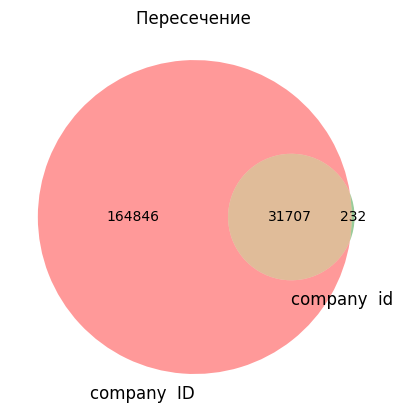

In [7]:
# Выполним проверку, насколько совпадают значения в company ID и company  id
first_id = set(df_rounds["company  ID"].dropna().unique())
second_id = set(df_rounds["company  id"].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=("company  ID", "company  id"))

# Отображаем график
plt.title("Пересечение ")
plt.show()

Дополнительно изучим значения в полях `funding total` и `raised amount`

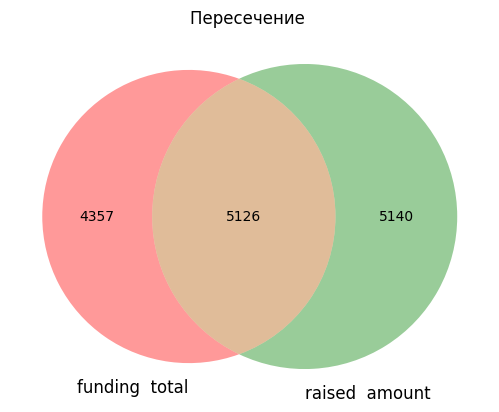

In [8]:
# Выполним проверку, насколько совпадают значения в funding  total и raised  amount
first_id = set(df_rounds["funding  total"].dropna().unique())
second_id = set(df_rounds["raised  amount"].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=("funding  total", "raised  amount"))

# Отображаем график
plt.title("Пересечение ")
plt.show()

In [9]:
# Заменим название колонок на snake case
df_rounds.columns = df_rounds.columns.str.lower().str.replace("  ", "_")

In [10]:
# Найдем дубликаты
duplicates = df_rounds.columns[df_rounds.columns.duplicated()]
print("Duplicate columns:", duplicates.tolist())

Duplicate columns: ['company_id']


In [11]:
# Переименуем дублирующийся столбец company_id
# Найдём все столбцы с именем 'company_id'
company_id_positions = [
    i for i, col in enumerate(df_rounds.columns) if col == "company_id"
]

# Переименуем второй столбец
if len(company_id_positions) > 1:
    df_rounds.columns.values[company_id_positions[1]] = "company_id_2"

# Выведем названия столбцов
# display(df_rounds.columns)

In [12]:
# Выведем общую информацию о датафрейме
# df_rounds.info()

Датафрейм df_rounds включает в себя 217774 строк, 22 столбцов, в которых представлена информация о компаниях и раундах финансирования:

*Подбробная информация о характере и типах данных, количестве нулевых значений удалены*

- Идентификатор компании.Тип данных необходимо заменить на int64.
- Название компании
- Категория области деятельности компании
- Статус компании
- Дата инвестирования. Тип данных object необходимо заменить на datetime64
- Дата закрытия компании. Тип данных object необходимо заменить на datetime64
- Официальный сайт компании
- Ник компании в сети
- Код страны компании
- Число инвестиционных раундов
- Число раундов финансирования. Тип данных float64 необходимо заменить на int64 или int8
- Сумма финансирования. Тип данных float64 необходимо заменить на int64 или int8
- Вехи финансирования. Тип данных float64 необходимо заменить на int64 или int8
- Идентификатор этапа финансирования. Тип данных float64 необходимо заменить на int64 или int8
- Идентификатор компании. Тип данных float64 необходимо заменить на int64 или int8, почти полностью пересекается с другим столбцов с идентификатором компании.
- Дата финансирования. Тип данных object необходимо заменить на datetime64
- Тип финансирования
- Сумма финансирования. По смыслу совпадает с другим столбцов, описывающем сумму финансирования и частично перекрывается с ним
- Предварительная денежная оценка
- Число участников. Тип данных float64 необходимо заменить на int64 или int8
- Является ли раунд первым. Тип данных float64 необходимо заменить на int64 или int8
- Является ли раунд последним. Тип данных float64 необходимо заменить на int64 или int8

Особенностью данного датафрейма является большое количество нулевых значений. Датасет выглядит таким образом, будто он представляет объединение двух датасетов, что является причиной наличия нулевых значений практически во всех столбцах.

#### Датафрейм `df_people`

In [13]:
# Выведем информацию о датафрейме df_people
# df_people.info()

In [14]:
# Изучим содержимое первых 5 строк датафрейма df_people
# df_people.head()

Датафрейм `df_people` включает в себя 226709 строк, 5 столбцов, в которых представлена информация о сотрудниках.

*Подбробная информация о характере и типах данных, количестве нулевых значений удалены*

- Идентификатор сотрудника. Название столбца двусмысленное, можно заменить на person_id.
- Имя сотрудника
- Фамилия сотрудника
- Идентификатор компании
- Ник в социальных сетях

#### Датафрейм `df_education`

In [15]:
# Выводим информацию о датафрейме df_education
# df_education.info()

In [16]:
# Изучим содержимое первых 5 строк датафрейма df_education
# df_education.head()

Датафрейм `df_education` включает в себя 109610 строк, 4 столбца, в которых представлена информация об образовании сотрудников:

*Подбробная информация о характере и типах данных, количестве нулевых значений удалены*

- Идентификатор записи об образовании. Название столбца двусмысленное, необходимо уточнить, например, id_education
- Идентификатор работника
- Название учебного заведения
- Дата получения образования. Тип object, необходимо заменить на datetime64

#### Датафрейм `df_degrees`

In [17]:
# Выводим информацию о датафрейме df_degrees
# df_degrees.info()

In [18]:
# Изучим содержимое первых 5 строк датафрейма df_education
# df_degrees.head()

Датафрейм `df_degrees` включает в себя 109610 строк, 4 столбца, в которых представлена информация о типе образования сотрудников:

*Подбробная информация о характере и типах данных, количестве нулевых значений удалены*

- Идентификатор записи. Название двусмысленное, рекомендуется заменить на id_degree
- Идентификатор сотрудника 
- Тип образования
- Специальность

### Смена типов данных и анализ пропусков

#### Смена типов данных

Обработаем типы данных в столбцах, которые хранят значения даты и времени.

Для выполнения последующих работ необходимо преобразовать следующие столбцы:
* `df_acquisition`: столбец `acquired_at`
* `df_rounds`: столбец `founded_at`, `funded_at`

In [19]:
# Приводим тип данных к datetime64 для столбца acquired_at датафрейма df_acquisition
df_acquisition["acquired_at"] = pd.to_datetime(df_acquisition["acquired_at"])

In [20]:
# Приводим тип данных к datetime64 для столбцов founded  at, funded  at датафрейма df_rounds
df_rounds["founded_at"] = pd.to_datetime(df_rounds["founded_at"])
df_rounds["funded_at"] = pd.to_datetime(df_rounds["funded_at"])

#### Анализ пропусков

##### Датафрейм `df_acquisition`

In [21]:
# Посчитаем количество пропусков, которые записались как строки 'nan'
(df_acquisition == "nan").sum()

id                      0
acquiring_company_id    0
acquired_company_id     0
term_code               0
price_amount            0
acquired_at             0
dtype: int64

In [22]:
# посчитаем количество пропусков в каждом столбце df_acquisition в абсолютных значениях
display(df_acquisition.isna().sum())

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [23]:
# посчитаем количество пропусков в каждом столбце в относительных значениях
df_acquisition_gaps_count = (
    df_acquisition.isna().mean().mul(100).sort_values(ascending=False)
)
df_acquisition_gaps_count = round(df_acquisition_gaps_count, 2)
display(df_acquisition_gaps_count)

term_code               80.54
acquired_at              0.31
id                       0.00
acquiring_company_id     0.00
acquired_company_id      0.00
price_amount             0.00
dtype: float64

##### Датафрейм `df_rounds`

In [24]:
# Посчитаем количество пропусков, которые записались как строки 'nan'
(df_rounds == "nan").sum()

company_id             0
name                   0
category_code          0
status                 0
founded_at             0
closed_at              0
domain                 0
network_username       0
country_code           0
investment_rounds      0
funding_rounds         0
funding_total          0
milestones             0
funding_round_id       0
company_id_2           0
funded_at              0
funding_round_type     0
raised_amount          0
pre_money_valuation    0
participants           0
is_first_round         0
is_last_round          0
dtype: int64

<AxesSubplot:>

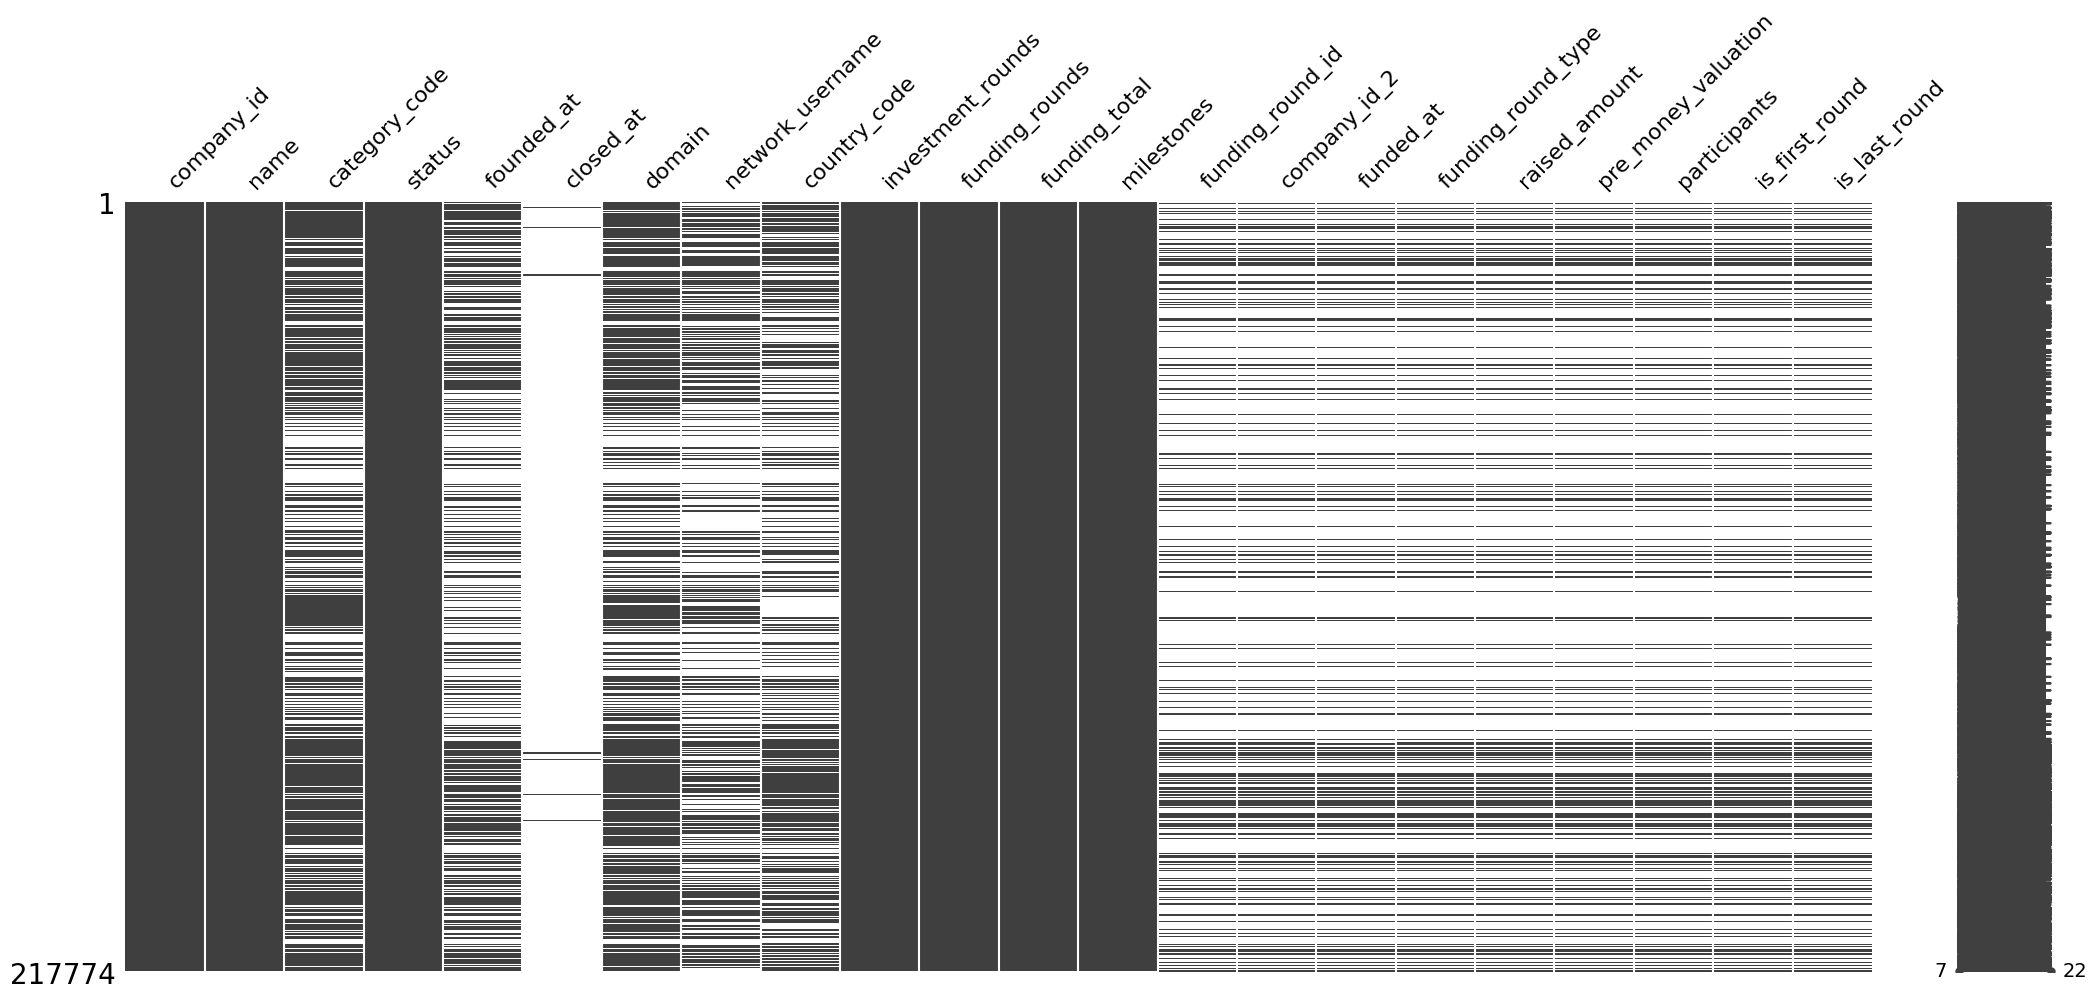

In [25]:
# Визуализируем пропуски
msno.matrix(df_rounds)

<AxesSubplot:>

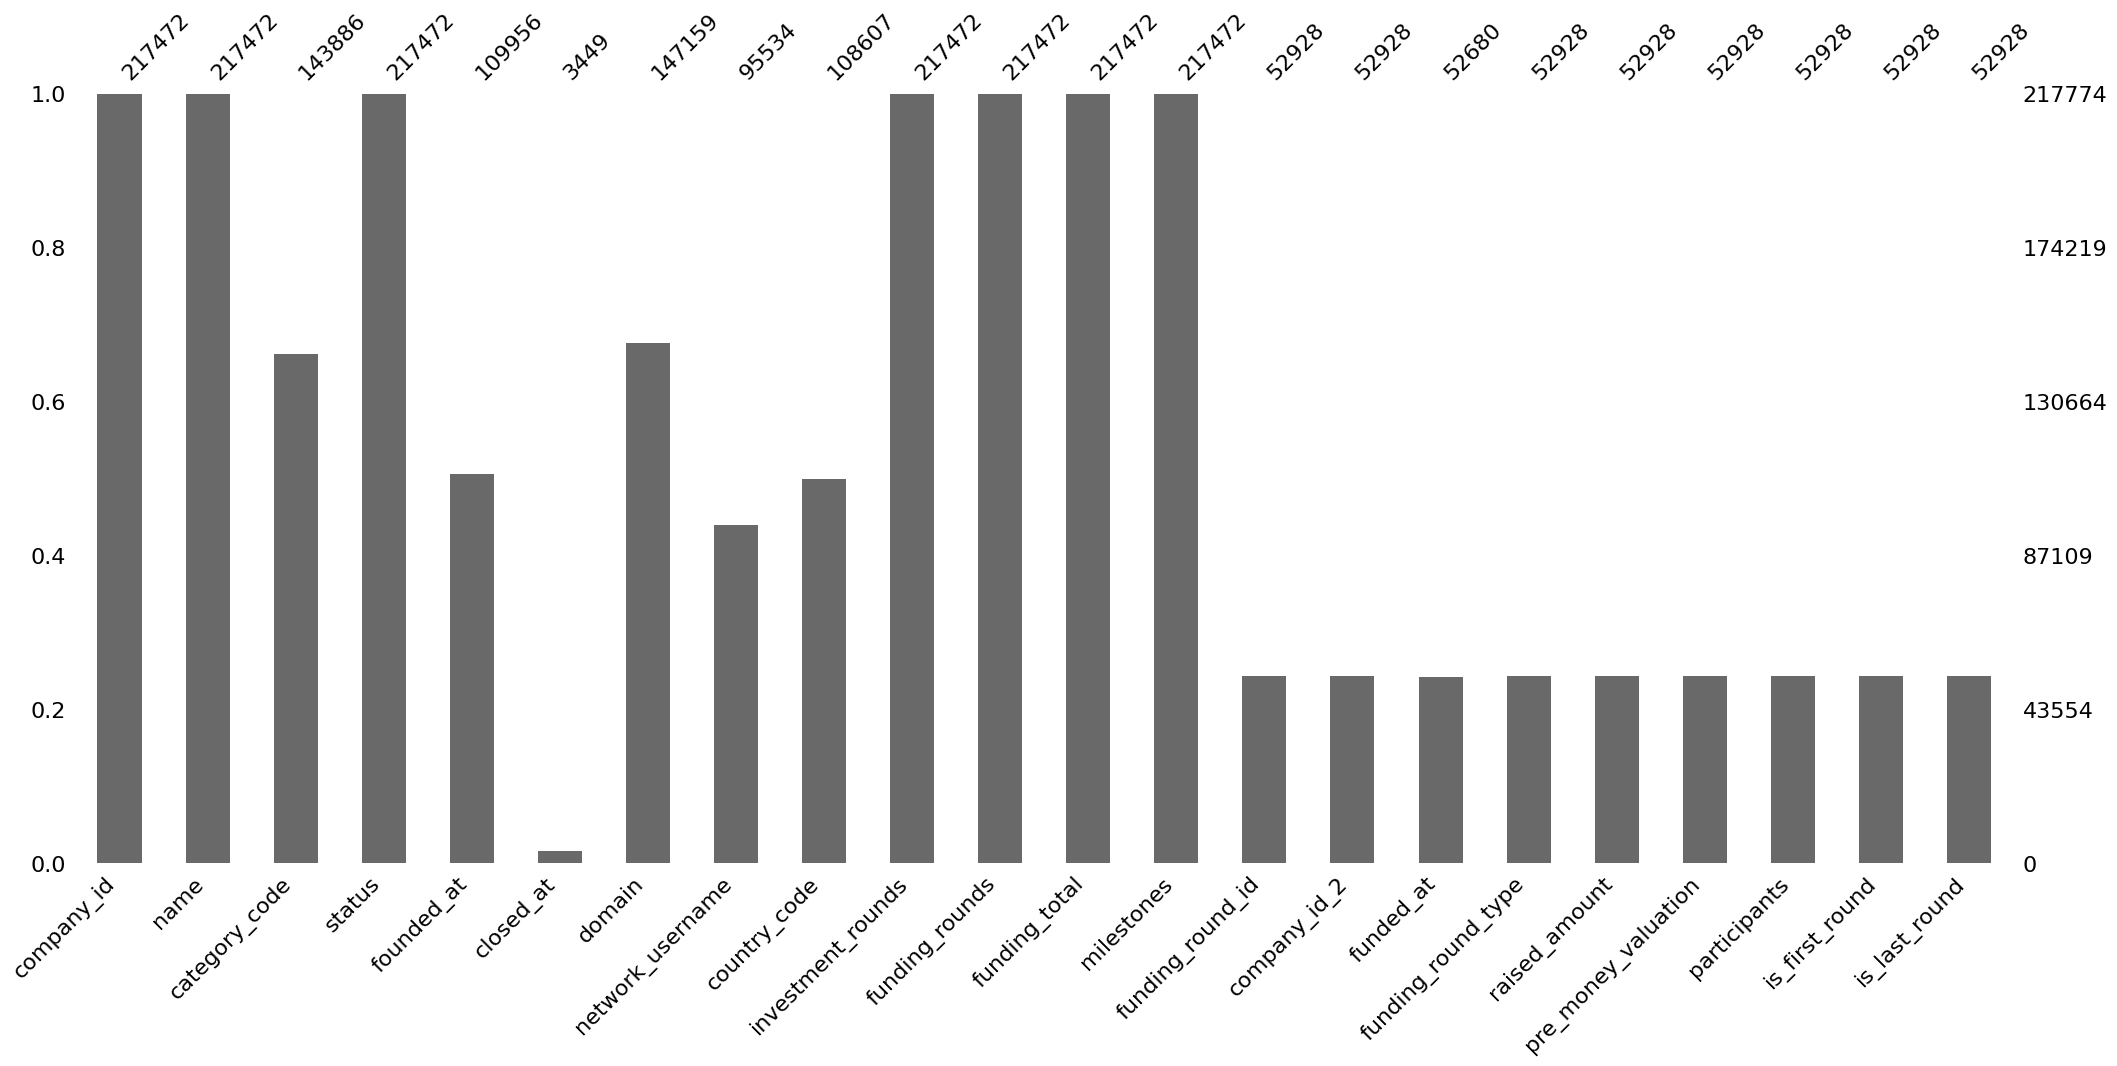

In [26]:
# Визуализируем пропуски с помощью столбчатой диаграммы
msno.bar(df_rounds)

In [27]:
# посчитаем количество пропусков в каждом столбце df_rounds в абсолютных значениях
display(df_rounds.isna().sum())

company_id                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_2           164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [28]:
# посчитаем количество пропусков в каждом столбце в относительных значениях
df_rounds_gaps_count = df_rounds.isna().mean().mul(100).sort_values(ascending=False)
df_rounds_gaps_count = round(df_rounds_gaps_count, 2)


display(df_rounds_gaps_count)

closed_at              98.42
funded_at              75.81
is_last_round          75.70
is_first_round         75.70
participants           75.70
pre_money_valuation    75.70
raised_amount          75.70
funding_round_type     75.70
funding_round_id       75.70
company_id_2           75.70
network_username       56.13
country_code           50.13
founded_at             49.51
category_code          33.93
domain                 32.43
company_id              0.14
milestones              0.14
name                    0.14
funding_rounds          0.14
investment_rounds       0.14
status                  0.14
funding_total           0.14
dtype: float64

*Промежуточный вывод по датафрейму `df_rounds`:*

* Не выявлены пропуски, которые записались, как строки 'nan'
* Оценена структура пропусков, на столбчатой диаграмме явно видно, какие столбцы были присоединены из другого датафрейма (`funding_round_id` - `is_last_round`)
* Среднее количество пропусков наблюдается в столбцах `category_cone`, `founded_at`, `domain`, `network_username`, `country_code`. Структура пропусков на матрице похожа, но не совпадает полностью. Возможно подобной информации не было в присоединенном датафрейме, поэтому она пустует в части данных, при этом в первом датафрейме данная информация была. 
* Предположительно, те столбцы, которые содержат минимальное кличество пропусков, включают в себя информацию, которая наблюдалась и в обоих датасетах, которые были у заказчика до объединение, тем самым обеспечивается полнота данных в данны столбцах. Возможно для данных столцов уже ранее предпринимались действия по объединению данных из двух столцов в один.
* Столбец `closed_at` имеет много пропусков, что говорит о том, что мало компаний закрылось. Это странно, так как для стартапов характерно то, что большое количество компаний имеет короткий срок жизни.

##### Датафрейм `df_education`

In [29]:
# Посчитаем количество пропусков, которые записались как строки 'nan'
(df_education == "nan").sum()

id              0
person_id       0
instituition    0
graduated_at    0
dtype: int64

In [30]:
# посчитаем количество пропусков в каждом столбце df_education в абсолютных значениях
display(df_education.isna().sum())

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [31]:
# посчитаем количество пропусков в каждом столбце в относительных значениях
df_education_gaps_count = (
    df_education.isna().mean().mul(100).sort_values(ascending=False)
)
df_education_gaps_count = round(df_education_gaps_count, 2)
display(df_education_gaps_count)

graduated_at    47.04
instituition     0.05
id               0.00
person_id        0.00
dtype: float64

##### Датафрейм `df_people`

In [32]:
# Посчитаем количество пропусков, которые записались как строки 'nan'
(df_people == "nan").sum()

id                  0
first_name          0
last_name           0
company_id          0
network_username    0
dtype: int64

In [33]:
# посчитаем количество пропусков в каждом столбце df_people в абсолютных значениях
display(df_people.isna().sum())

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [34]:
# посчитаем количество пропусков в каждом столбце в относительных значениях
df_people_gaps_count = df_people.isna().mean().mul(100).sort_values(ascending=False)
df_people_gaps_count = round(df_people_gaps_count, 2)
display(df_people_gaps_count)

company_id          84.73
network_username    82.86
first_name           0.00
last_name            0.00
id                   0.00
dtype: float64

##### Датафрейм `df_degrees`

In [35]:
# Посчитаем количество пропусков, которые записались как строки 'nan'
(df_degrees == "nan").sum()

id             0
object_id      0
degree_type    0
subject        0
dtype: int64

In [36]:
# посчитаем количество пропусков в каждом столбце df_degrees в абсолютных значениях
display(df_degrees.isna().sum())

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [37]:
# посчитаем количество пропусков в каждом столбце в относительных значениях
df_degrees_gaps_count = df_degrees.isna().mean().mul(100).sort_values(ascending=False)
df_degrees_gaps_count = round(df_degrees_gaps_count, 2)
display(df_degrees_gaps_count)

subject        25.83
degree_type    10.23
id              0.00
object_id       0.00
dtype: float64

##### Вывод

Посчитано количество пропусков и доля пропусков в датафреймах. Во многих датафреймах присутствуют столбцы, в которых доля пропусков доходит до 75%-90%

Для датафрейма `df_rounds`, представляющего наибольший интерес, выявлено следующее:

* Не выявлены пропуски, которые записались, как строки 'nan'
* Оценена структура пропусков, на столбчатой диаграмме явно видно, какие столбцы были присоединены из другого датафрейма (`funding_round_id` - `is_last_round`)
* Среднее количество пропусков наблюдается в столбцах `category_cone`, `founded_at`, `domain`, `network_username`, `country_code`. Структура пропусков на матрице похожа, но не совпадает полностью. Возможно подобной информации не было в присоединенном датафрейме, поэтому она пустует в части данных, при этом в первом датафрейме данная информация была. 
* Предположительно, те столбцы, которые содержат минимальное кличество пропусков, включают в себя информацию, которая наблюдалась и в обоих датасетах, которые были у заказчика до объединение, тем самым обеспечивается полнота данных в данны столбцах. Возможно для данных столцов уже ранее предпринимались действия по объединению данных из двух столцов в один.
* Столбец `closed_at` имеет много пропусков, что говорит о том, что мало компаний закрылось. Это странно, так как для стартапов характерно то, что большое количество компаний имеет короткий срок жизни.

## Предобработка данных, предварительное исследование данных


### Исследование динамики финансирования стартапов в разрезе года

Ввиду требований заказчика, на основании датафрейма df_rounds без дополнительной предобработки необходимо подробно изучить динамику финансирования стартапов в разрезе года: типичный размер средств в рамках одного раунда, общее количество раундов финансирования.
Необходимо визуализировать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования для тех лет, для которых присутствует информация о более чем 50 раундах финансирования.

In [38]:
# В датафрейме df_rounds создадим столбец с информацией о годе из funded_at, которую выведем в отдельный столбец
df_rounds["funded_at_year"] = df_rounds["funded_at"].dt.year
# Преобразуем тип данных в integer
df_rounds["funded_at_year"] = pd.to_numeric(
    df_rounds["funded_at_year"], errors="coerce"
).astype("Int64")

In [39]:
# Создадим сводную таблицу по годам
pivot_funds = (
    df_rounds.groupby("funded_at_year")["raised_amount"]
    .agg(["median", "count"])
    .dropna()
)
# Выполним фильтрацию оставим информацию для лет, для которых есть информация о более 50 раундах финансирования
filtered_pivot_funds = pivot_funds[pivot_funds["count"] > 50].copy()

# Год, в который размер средств был максимальный
raised_amount_max = filtered_pivot_funds["median"].idxmax()
display(f"В {raised_amount_max} году размер средств был максимальным")

display(filtered_pivot_funds)

'В 2005 году размер средств был максимальным'

,median,count
funded_at_year,,
1999,2000000.0,76
2000,4200000.0,125
2001,3000000.0,96
2002,4200000.0,116
2003,3000000.0,159
2004,5000000.0,291
2005,5500000.0,1633
2006,5000000.0,2436
2007,3973320.0,3279


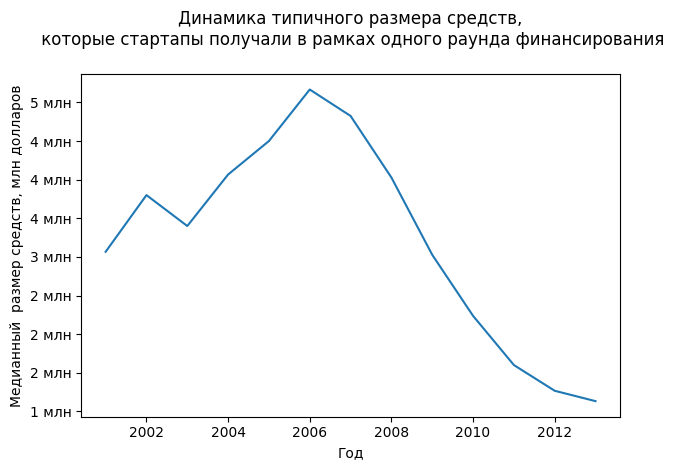

In [40]:
# Добавим информацию о скользящецй кривло
filtered_pivot_funds["median"] = filtered_pivot_funds["median"].rolling(window=3).mean()

# Построим линейный график
graph = filtered_pivot_funds["median"].plot(
    kind="line",
    title="Динамика типичного размера средств,\n которые стартапы получали в рамках одного раунда финансирования\n",
    xlabel="Год",
    ylabel="Медианный  размер средств, млн долларов",
)

# Переводим в миллионы
graph.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f} млн"))


plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Динамика количество раундов,\n которые стартапы получали в течение года\n'}, xlabel='Год', ylabel='Количество раундов, шт'>

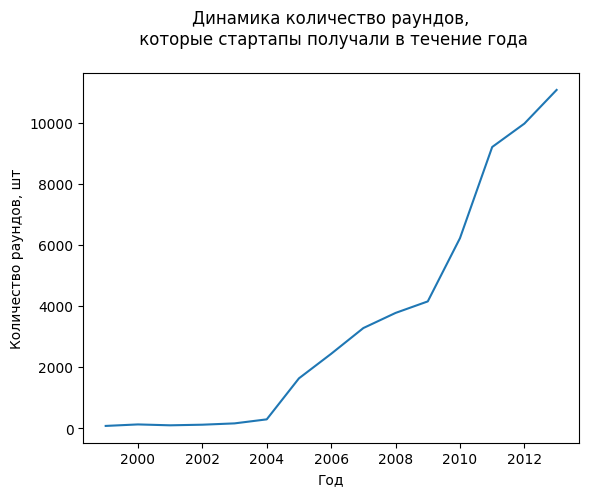

In [41]:
# Построим линейный график
filtered_pivot_funds["count"].plot(
    kind="line",
    title="Динамика количество раундов,\n которые стартапы получали в течение года\n",
    xlabel="Год",
    ylabel="Количество раундов, шт",
)

**Выводы:**

- Типичный размер собранных в рамках одного раунда средств был максимален в **2005** году и составил 5500000 долларов с количеством раундов 1633
- В **2013** году наблюдался тренд по увеличению количества раундов инвестиций, значение было максимальным - 11072 раундов инвестиций, по среднему размеру средств тренд в целом нисходящий от года к году, в 2013 наблюдается небольшой локальный максимум, однако в целом тренд нисходящий.
- От года к году наблюдается планомерное увеличение количества раундов инвестирования
- Таким образом, со временем изменился тренд, изначально выделяли больше средств, но реже, а потом стали выделять меньше, но чаще.


### Исследование зависимости полноты сведений об образовании сотрудника от размера компании

Необходимо оценить полноту сведений об образовании сотрудника от размера компаний, категоризировав компании на группы.

In [42]:
# Переименуем колонку id в датафрейме df_people на person_id
df_people_renamed = df_people.rename(columns={"id": "person_id"})

In [43]:
# Для выполнения исследования объединим датафреймы df_people и df_education
df_people_education = df_people_renamed.merge(df_education, on="person_id", how="left")
# Переименуем столбец id в id_education для того, чтобы убрать двусмысленность
df_people_education = df_people_education.rename(columns={"id": "education_id"})
# выведем информацию о датафрейме
# df_people_education.info()

In [44]:
# Ищем  дубликаты по сочетанию company_id и person_id
duplicates_df_people_education = df_people_education.duplicated(
    subset=["person_id", "company_id"], keep=False
)
duplicates_df_people_education_number = duplicates_df_people_education.sum()
display(duplicates_df_people_education_number)

73213

Наблюдается 73213 дубликатов по сочетанию имени и фамилии


In [45]:
# Удалим дубликаты по сочетанию company_id и person_id
# Посчитаем количество строк до удаления
df_people_education_number = len(df_people_education)
# Удаляем неявные дубликаты
df_people_education = df_people_education.drop_duplicates(
    subset=["person_id", "company_id"], keep="first", inplace=False
)
# Посчитаем количество строк в датафрейме после удаления
clean_df_people_education = len(df_people_education)
display(
    f"количество строк в датасете df_people_education после удаления: {clean_df_people_education}"
)

'количество строк в датасете df_people_education после удаления: 226709'

In [46]:
# Изменим тип данных для столбца company_id
df_people_education["company_id"] = pd.to_numeric(
    df_people_education["company_id"], errors="coerce"
).astype("Int64")

Разделим компании по группам по количеству сотрудников. Так как для стартапов характерно малое количество сотрудников, то выделим следующие типы предприятий:
* 1 сотрудник
* 2 сотрудника
* 4-5 сотрудников
* 6-10 сотрудников
* 11-25 сотрудников
* 26+ сотрудников
  
Это позволит разделить данные на более менее равные категории по количеству сотрудников, насколько это возможно

In [47]:
# Сгруппируем данные, посчитаем количество сотрудников в компании
df_company_scale = (
    df_people_education.groupby("company_id").agg({"person_id": "count"}).reset_index()
)


# Переименуем столбец person_id в person_id_count для того, чтобы убрать дублирование названий столбцов на последующих этапах
df_company_scale = df_company_scale.rename(columns={"person_id": "person_id_count"})

df_company_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22922 entries, 0 to 22921
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   company_id       22922 non-null  int64
 1   person_id_count  22922 non-null  int64
dtypes: int64(2)
memory usage: 358.3 KB


In [48]:
# Разобъем данные на категории
df_company_scale["company_size"] = pd.cut(
    df_company_scale["person_id_count"],
    bins=[0, 1, 2, 3, 5, 10, 25, float("inf")],
    labels=["1", "2", "3", "4-5", "6-10", "11-25", "26+"],
    right=True,  # правая граница интервала включается, а левая - нет
    include_lowest=True,  # нижняя граница первой корзины включается
)
# Проверим, сколько предприятий в каждой категории
df_company_scale["company_size"].value_counts()

1        18117
2         2709
3          921
4-5        687
6-10       368
11-25      101
26+         19
Name: company_size, dtype: int64

Объединим df_company_scale и df_people_education по столбцу company_id для того, чтобы посчитать долю сотрудников без информации об образовании

In [49]:
# Объединим датафреймы df_people_education и df_company_scale, в который включена категоризация
# Для начала приведем данные в столбцах, по которым будем объединять, к типу integer

df_people_education["company_id"] = pd.to_numeric(
    df_people_education["company_id"], errors="coerce"
).astype("Int64")
df_company_scale["company_id"] = pd.to_numeric(
    df_company_scale["company_id"], errors="coerce"
).astype("Int64")

# Объединяем датафремы
df_people_education = df_people_education.merge(
    df_company_scale, on="company_id", how="left"
)

Оценим среднюю долю сотрудников без информации об образовании в каждой из групп


In [50]:
# Рассчитываем количество сотрудников с пустыми записями об образовании no_education_count и общее количество сотрудников в каждой категории total_count
df_people_education_gaps = df_people_education.groupby("company_size").agg(
    no_education_count=("education_id", lambda x: x.isna().sum()),
    total_count=("person_id", "count"),
)
display(df_people_education_gaps)

,no_education_count,total_count
company_size,,
1,8381.0,18117
2,2525.0,5418
3,1345.0,2763
4-5,1490.0,2985
6-10,1422.0,2664
11-25,650.0,1425
26+,338.0,1243


In [51]:
# Рассчитаем долю сотрудников без образования
df_people_education_gaps["no_education_share"] = (
    df_people_education_gaps["no_education_count"]
    / df_people_education_gaps["total_count"]
    * 100
)
df_people_education_gaps["no_education_share"] = round(
    df_people_education_gaps["no_education_share"], 2
)
display(df_people_education_gaps)

,no_education_count,total_count,no_education_share
company_size,,,
1,8381.0,18117,46.26
2,2525.0,5418,46.60
3,1345.0,2763,48.68
4-5,1490.0,2985,49.92
6-10,1422.0,2664,53.38
11-25,650.0,1425,45.61
26+,338.0,1243,27.19


**Вывод:**


Данные разбиты по группам по количеству сотрудников. Были выбраны следущие группы на основании специфики стартапов, для которых характерно малое количество сотрудников, рассчитана доля сотрудников без образования:

* 1 человек: 46.26% 
* 2 человека: 46.60% 
* 3 человека: 48.68%
* 4-5 человек: 48.92%
* 6-10 человек: 53.38%
* 11-25 человек: 45.61%
* 26+ человек: 27.19%

### Изучение данных столбца `network_username`

Изучим данные столбца `network_username`, который встречается в нескольких датафреймах, с целью выявить дублирующую информацию и возможность объединения данных по этому столбцу.

In [52]:
# Выведем столбец network_username из датафреймов df_rounds и df_people
# display(df_rounds["network_username"])
# display(df_people["network_username"])

In [53]:
# В одной ячейке выведем названия столбцов трех датафреймов
display(df_rounds.columns)
display(df_people.columns)
display(df_funds.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'funded_at_year'],
      dtype='object')

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

'Совпадений: 2199'

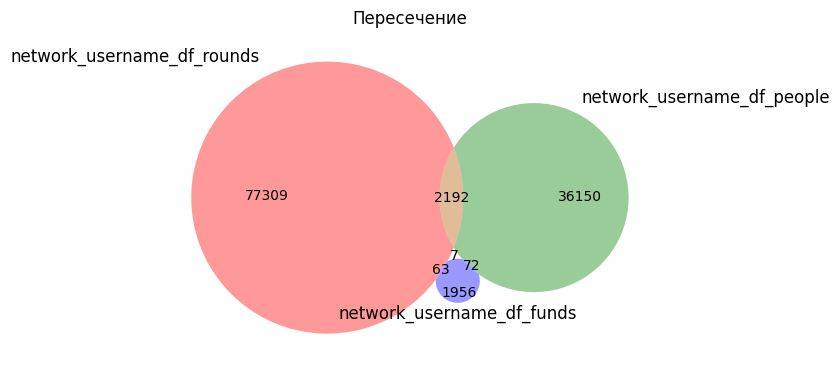

In [54]:
# Выполним проверку, насколько совпадают значения в network_username
first_id = set(df_rounds["network_username"].dropna().unique())
second_id = set(df_people["network_username"].dropna().unique())
third_id = set(df_funds["network_username"].dropna().unique())

# Ищем совпадения
common_usernames = first_id & second_id
display(f"Совпадений: {len(common_usernames)}")

# Строим диаграмму Венна
venn3(
    [first_id, second_id, third_id],
    set_labels=(
        "network_username_df_rounds",
        "network_username_df_people",
        "network_username_df_funds",
    ),
)

# Отображаем график
plt.title("Пересечение")
plt.show()

**Вывод:**

На предыдущих этапах, при знакомстве и предобработке данных было выявлено следующее:
* Столбец `network_username`, принадлежащий датафрейму `df_rounds`, содержит 122240 пустых значений, а процент пропусков в данном столбце составляет 56.13%
* Столбец `network_username`, принадлежащий датафрейму `df_people`, содержит 187842 пустых значений, а процент пропусков составляет 82.86%

Также дополнительно было изучено, что датафрейм, содержащий информацию о количестве раундов, также включает в себя столбец `network_username`.

При помощи диаграммы Венна было изучено пересечение данных в этих трех столбцах и обнаружено, что пересечений мало, вероятно, столбцы относятся к разным сущностями - ник сотрудника/ник компании/ник фонда. Т.е. хоть столбцы и называются одинаково, они несут разную информацию.

Таким образом, объединение датафреймов по столбцу `network_username` смысла не имеет.


### Изучение причины возникновения пропусков в датафрейме `df_rounds`

Датафрейм `df_rounds` включает в себя информацию о раундах, которая важна для дальнейшего проведения анализа в разрезе отдельных компаний. При этом данные содержат большое количество пропусков. 
Необходимо подготовить данные для дальнейшего анализа.

In [55]:
# Еще раз выведем информацию о датафрейме df_rounds
# df_rounds.info()

In [56]:
# Еще раз выведем первые 4 строчки df_rounds
# df_rounds.head()

In [57]:
# Выведем количество пропусков в каждом столбце в относительных значениях
display(df_rounds_gaps_count)

closed_at              98.42
funded_at              75.81
is_last_round          75.70
is_first_round         75.70
participants           75.70
pre_money_valuation    75.70
raised_amount          75.70
funding_round_type     75.70
funding_round_id       75.70
company_id_2           75.70
network_username       56.13
country_code           50.13
founded_at             49.51
category_code          33.93
domain                 32.43
company_id              0.14
milestones              0.14
name                    0.14
funding_rounds          0.14
investment_rounds       0.14
status                  0.14
funding_total           0.14
dtype: float64

In [58]:
# Проводим объединение столбцов column_id и column_id_2
df_rounds["company_id"] = df_rounds["company_id"].combine_first(
    df_rounds["company_id_2"]
)
# Удалим дублирующий столбец
df_rounds = df_rounds.drop(columns="company_id_2")

In [59]:
# Проводим объединение столбцов funding_total и raised_amount
df_rounds["funding_total"] = df_rounds["funding_total"].combine_first(
    df_rounds["raised_amount"]
)
# Удалим дублирующий столбец
df_rounds = df_rounds.drop(columns="raised_amount")

Для решения последующих задач нам необходимо формировать датафрейм, включающий в себя следующие столбцы:

* company_id
* name
* status
* investment_rounds
* funding_rounds
* funding_total
* price_amount из df_acquisition

In [60]:
# Создадим датафрейм df
df = df_rounds[
    [
        "company_id",
        "name",
        "status",
        "investment_rounds",
        "funding_rounds",
        "funding_total",
        "category_code",
    ]
]
# Присоединим столбец price_amount из df_acquisition
df = df.merge(
    df_acquisition, left_on="company_id", right_on="acquired_company_id", how="left"
)
# Удалим лишние столбцы, присоединенные из df_acquisition
df = df.drop(
    columns=[
        "id",
        "acquiring_company_id",
        "acquired_company_id",
        "term_code",
        "acquired_at",
    ]
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217963 entries, 0 to 217962
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   company_id         217963 non-null  float64
 1   name               217661 non-null  object 
 2   status             217661 non-null  object 
 3   investment_rounds  217661 non-null  float64
 4   funding_rounds     217661 non-null  float64
 5   funding_total      217963 non-null  float64
 6   category_code      144052 non-null  object 
 7   price_amount       11743 non-null   float64
dtypes: float64(5), object(3)
memory usage: 15.0+ MB


In [61]:
# Выведем первые 5 строк датафрейма
# df.head()

In [62]:
# Столбцы с типом данных float64 заменим на int64
df["company_id"] = pd.to_numeric(df["company_id"], errors="coerce").astype("Int64")
df["investment_rounds"] = pd.to_numeric(
    df["investment_rounds"], errors="coerce"
).astype("Int64")
df["funding_rounds"] = pd.to_numeric(df["funding_rounds"], errors="coerce").astype(
    "Int64"
)
df["funding_total"] = pd.to_numeric(df["funding_total"], errors="coerce").astype(
    "Int64"
)
df["price_amount"] = pd.to_numeric(df["price_amount"], errors="coerce").astype("Int64")

# df.info()

In [63]:
# Приведем name к единому виду
df["name"] = df["name"].str.lower()

In [64]:
# Проверим категориальные данные в столбце status
# df["status"].value_counts()
# Все ок, дублей нет

In [65]:
# посчитаем количество пропусков в каждом столбце в относительных значениях
df_gaps_count = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
df_gaps_count = round(df_gaps_count, 2)
display(df_gaps_count)

price_amount         94.61
category_code        33.91
name                  0.14
status                0.14
investment_rounds     0.14
funding_rounds        0.14
company_id            0.00
funding_total         0.00
dtype: float64

Пропущенные значения имеются у столбцов name, status, funding_rounds, investment_rounds, category_code. Скорее всего, они пропадут при агрегации.
Какие-то дополнительные действия с пропусками выполнять не будем, оставим, как есть.

In [66]:
# Находим дубликаты
duplicates = df[df.duplicated(keep=False)]

display(f"Количество дубликатов {len(duplicates)}")

# Сохраняем количество строк до удаления дубликатов
row_count = df.shape[0]

'Количество дубликатов 32312'

In [67]:
# Удаляем дубликаты
df_no_duplicates = df.drop_duplicates()

# Сохраняем количество строк после удаления дубликатов
row_count_no_duplicates = df_no_duplicates.shape[0]

# Посчитаем долю удаленных дубликатов
duplicates_shares = round(
    (row_count - row_count_no_duplicates) / row_count_no_duplicates * 100, 2
)

# Выводим результаты
display(f"Количество строк до удаления дубликатов: {row_count}")
display(f"Количество строк после удаления дубликатов: {row_count_no_duplicates}")
display(f"Процент удаленных строк от исходного количества: {duplicates_shares}")

'Количество строк до удаления дубликатов: 217963'

'Количество строк после удаления дубликатов: 196904'

'Процент удаленных строк от исходного количества: 10.7'

In [68]:
# Выведем информацию о датафрейме
# df_no_duplicates.info()

**Вывод:**
* Объединены данные столбцов с информацией об id компании, лишний столбец удален. Результирующий столбец назвается `company_id`

* Объединены данные столбцов с информацией о сумме финансирования, лишний столбец удален, результирующий столбец называется `funding_total`

* Сформирован датафрейм `df`, который включает в себя только столбцы необходимые для дальнейшего анализа, включая столбец `price_amount` из датафрейма `df_acquisition`

   * Изменены типы данных в датафрейме df

   * Названия компаний приведены к нижнему регистру

   * Пустые значения в столбцах оставлены в неизменном виде

   * Удалены явные дубликаты, сформирован финальный датафрейм df_no_duplicates

* Возможная причина возникновения пропусков - объединены данные из двух таблиц в одну, при этом в каждой исходной таблице изначально данные собирались по-разному.


## Исследовательский анализ данных


### Фильтрация данных

Отберем те компании, которые меняли или готовы менять владельцев:  значения `funding_rounds` или `investment_rounds` больше нуля, или в колонке `status` указано `acquired`

In [69]:
# Отфильтруем датафрейм df_no_duplicates
filtered_df = df_no_duplicates.loc[
    (df_no_duplicates["funding_rounds"] > 0)
    | (df["investment_rounds"] > 0)
    | (df_no_duplicates["status"] == "acquired")
].copy()

#  Выводим информацию о датафрейме
# filtered_df.info()

In [70]:
# Выводим первые 5 строк датафрейма
# filtered_df.head()

**Вывод:**

Выполнена фильтрация датафрейма `df_no_duplicates`, получен результирующий датафрейм `filtered_df` 

Фильтрация выполнена таким образом, что выбираются компании, для которых характерно одно из следующих условий:

* значения `funding_round` больше нуля
* значения `investment_rounds` больше нуля
* значения `status` указаны как `acquired`

Полученный датафрейм `filtered_df` включает в себя 40803 строк.
В строках `company_id`, `name`, `status`, `investment_rounds`, `funding_rounds`, `funding_total` пустых значений нет, типы данных правильные.

В строке `price_amount` 9303 непустых значений, тип данных `Int64` является верным



### Анализ выбросов

In [71]:
# Добавим столбец с размером финансирования в миллионах (для удобства)
filtered_df.loc[:, "funding_total_mln"] = filtered_df["funding_total"] / 1000000

# filtered_df.head()

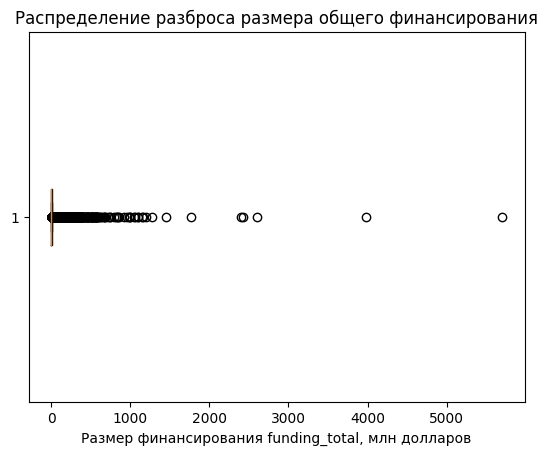

In [72]:
# Для оценки размера общего финансирования воспользуемся диаграммой размаха
plt.boxplot(
    filtered_df["funding_total_mln"],
    vert=False,
)

# Добавим заголовок
plt.title("Распределение разброса размера общего финансирования")

# Добавим подписи к осям
plt.xlabel("Размер финансирования funding_total, млн долларов")

plt.show()

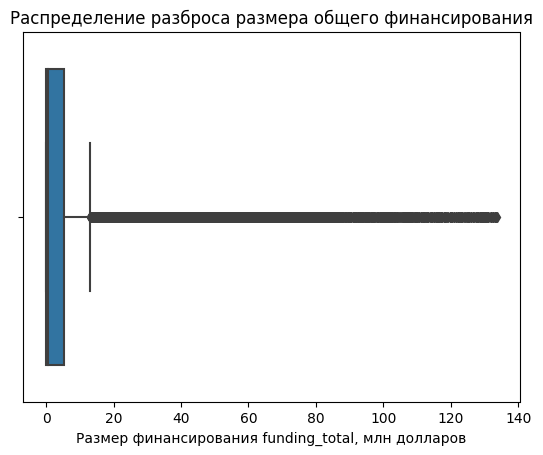

In [73]:
# Посмотрим, что будет, если данные отфильтровать
# Находим 99-й процентиль
outliers = filtered_df["funding_total_mln"].quantile(0.99)

# Отбираем данные, оставляя значения меньше найденного порога выбросов
filtered_df_outliers = filtered_df[filtered_df["funding_total_mln"] <= outliers]

# Строим диаграмму размаха
sns.boxplot(data=filtered_df_outliers, x=filtered_df_outliers["funding_total_mln"])
plt.title("Распределение разброса размера общего финансирования")
# Добавим подписи к осям
plt.xlabel("Размер финансирования funding_total, млн долларов")
plt.show()

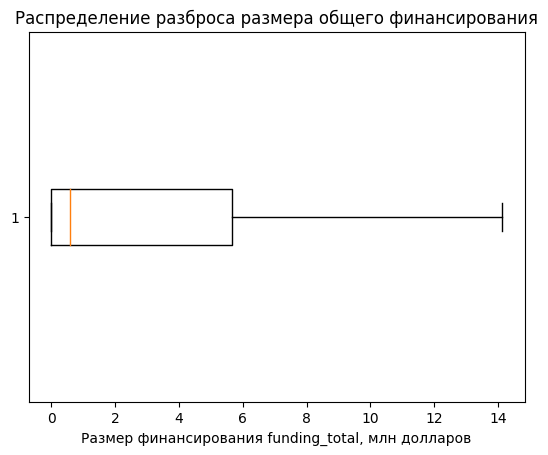

In [74]:
# Построим диаграмму размаха без отображения выбросов
plt.boxplot(filtered_df["funding_total_mln"], vert=False, showfliers=False)

# Добавим заголовок
plt.title("Распределение разброса размера общего финансирования")

# Добавим подписи к осям
plt.xlabel("Размер финансирования funding_total, млн долларов")

plt.show()

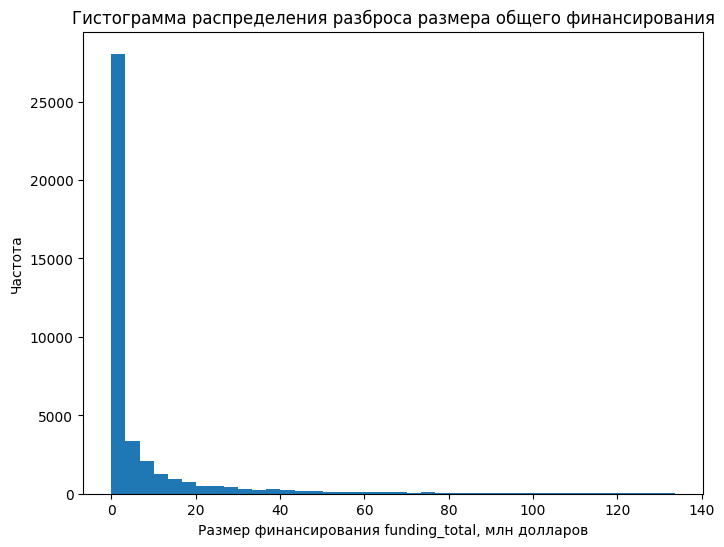

In [75]:
# Построим гистрограмму. Устанавливаем размеры графика
plt.figure(figsize=(8, 6))

# Строим гистограмму с 20 корзинами, настраивая параметры отображения
plt.hist(
    filtered_df_outliers["funding_total_mln"],
    bins=40,
    alpha=1,
)

# Устанавливаем заголовок графика
plt.title("Гистограмма распределения разброса размера общего финансирования")

# Устанавливаем подпись оси X
plt.xlabel("Размер финансирования funding_total, млн долларов")

# Устанавливаем подпись оси Y
plt.ylabel("Частота")

# Отображаем график
plt.show()

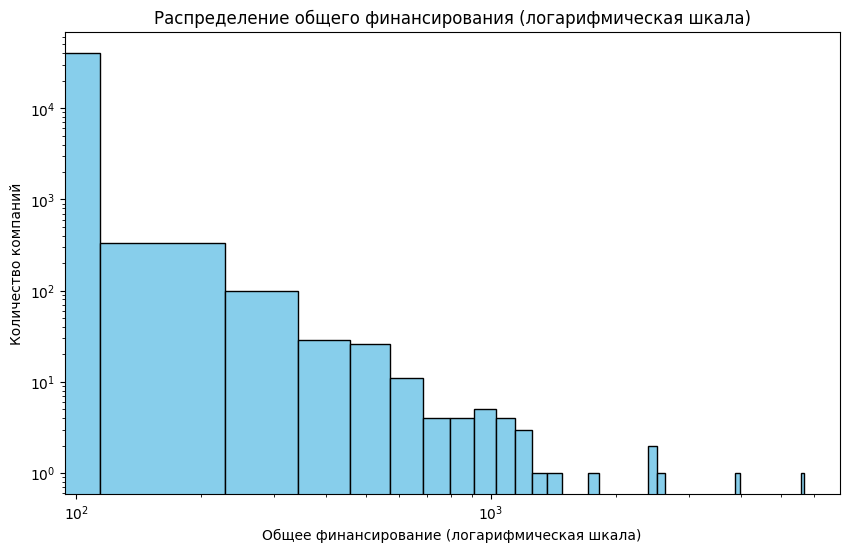

In [76]:
# Переведем данные в логарифмическую шкалу и выведем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(
    filtered_df["funding_total_mln"],
    bins=50,
    color="skyblue",
    edgecolor="black",
    log=True,
)
plt.xscale("log")  # Логарифмическая шкала по оси X
plt.xlabel("Общее финансирование (логарифмическая шкала)")
plt.ylabel("Количество компаний")
plt.title("Распределение общего финансирования (логарифмическая шкала)")
plt.show()

In [77]:
# Выведем статистики методом describe из столбца funding_total_mln датафрейма filtered_df_outliers, отображающего финансирование в миллионах долларов
filtered_df_outliers["funding_total_mln"].describe(include="all")

count    40394.000000
mean         6.872705
std         16.070892
min          0.000000
25%          0.000000
50%          0.571243
75%          5.250000
max        133.663000
Name: funding_total_mln, dtype: float64

In [78]:
# Выведем статистики методом describe из столбца funding_total_mln датафрейма filtered_df, отображающего финансирование в миллионах долларов
filtered_df["funding_total_mln"].describe(include="all")

count    40803.000000
mean        10.139704
std         56.438102
min          0.000000
25%          0.000000
50%          0.600000
75%          5.652280
max       5700.000000
Name: funding_total_mln, dtype: float64

**Вывод:**

Проанализирована информация о размере средств, которые предоставлялись компаниям, с использование данных датафрейма `filtered_df`. Для удобства данные из долларов переведены в миллионы долларов.

C использованием диаграммы размаха и гистограммы были изучены данные столбца `funding_total`, переведенные из долларов в миллионы долларов:
* Распределение выглядет ассиметрично
* Отфильтрован 99% персентиль. В обоих случаях максимальные значения сильно удалены от медианы. 

Результаты для данных с отфильтрованным 99% персентилем:

* Медианное значение финансирования составило 0.5712 млн долларов
* Максимальное значение финансирования составило 133.66 млн долларов
* Стандартное отклонение составило 16.07 млн долларов, что говорит о том, что на отфильтрованных данных вариабельность ниже.

Таким образом, для значений финансирования характерно смещение профиля значений, высокие значения не являются выбросами. Тем не менее, 1% самых высоких значений значимым образом искажает статистику. По-видимому это единичные компании, которые имеют экстремально высокий уровень финансирования



### Анализ компаний, проданных за 0 или 1 доллар

In [79]:
# Отфильтруем те компании, у которых price_amount 0 или 1 и общий объём финансирования > 0
filtered_df_price = filtered_df.loc[
    (filtered_df["price_amount"] <= 1) & (filtered_df["funding_total"] > 0)
]

# Выводим информацию о датафрейме
# filtered_df_price.info()

In [80]:
# Изучим информацию о столбце funding_total, полученном в результате фильтрации
filtered_df_price["funding_total_mln"].describe()

count    1593.000000
mean       17.989939
std       145.312236
min         0.003750
25%         2.000000
50%         6.000000
75%        15.400000
max      5700.000000
Name: funding_total_mln, dtype: float64

Наблюдается высокая вариация значений, медиана сильно отличается от среднего, что говорит от том, что в данных присутствуют выбросы. Стандартное отклонение составляет 145.31 млн долл, что также является показателем высокой вариабельности данных.


Вычислим аналитически верхнюю и нижнюю границу выбросов:

In [81]:
# Вычисляем квартили Q1 и Q3
Q1 = filtered_df_price["funding_total_mln"].quantile(0.25)
Q3 = filtered_df_price["funding_total_mln"].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем верхний порог для выбросов
upper_bound = Q3 + 1.5 * IQR

display(f"Верхний порог выбросов: {upper_bound}")

# Определяем нижний порог для выбросов
lower_bound = Q1 - 1.5 * IQR

display(f"Нижний порог выбросов: {lower_bound}")

'Верхний порог выбросов: 35.5'

'Нижний порог выбросов: -18.1'

Все положительные значения ниже квартиля Q1=35.5 млн долларов не являются выбросами, таким образом
Высчитаем, к какому персентилю относится значение 35.5 млн:

In [82]:
# Вычислим, к какому перцентилю относится значение 35.5 млн долларов в столбце funding_total_mln
percentile = percentileofscore(filtered_df_price["funding_total_mln"].dropna(), 35.5)
display(percentile)

91.02322661644696

Появляется предупреждение, которое не влияет на расчет, значение 35.5 млн долларов соответствует процентилю 91%

**Выводы:**


Исследованы компании, которые были проданы за 0 или за 1 доллар, с ненулевым общим объемом финансирования.

Таких компаний было выявлено 1593 штук, был создан отфильтрованный датафрейм `filtered_df_price`.

Для объем финасирования (в млн долларов), характерны следующие значения метрик:
* среднее: 17.989939 млн долларов
* стандартное отклонение (std): 145.312236 млн долларов
* минимальное значение: 0.003750 млн долларов
* 1 квартиль: 2.000000 млн долларов
* медиана: 6.000000 млн долларов
* 3 квартиль: 15.400000 млн долларов
* максимальное значение: 5700.000000 млн долларов

Рассчитана аналитически верхняя и нижняя граница выбросов для столбца `funding_total`:
* Вычисленная нижняя граница оказалась отрицательной, что говорит о том, что с нижней стороны выбросов не наблюдается, все значения от 0% перцентиля валидны
* Вычисленная верхняя граница составила 35.5 млн долларов, что соответствует 91% перцентилю

Для данного столбца наблюдается высокая вариация значений и большое количество выбросов в верхней части диапазона.


### Цены стартапов по категориям

Выделим категории стартапов, характеризующиеся: типично высокими ценами и наибольшим разбросом цен за стартап.
Такие стартапы могут быть привлекательными для инвесторов

In [83]:
# Оценим в штуках, какие категории стартапов присутствуют в данных
# filtered_df["category_code"].value_counts()

In [84]:
# Посмотрим доли для данных категорий
# filtered_df["category_code"].value_counts(normalize=True)

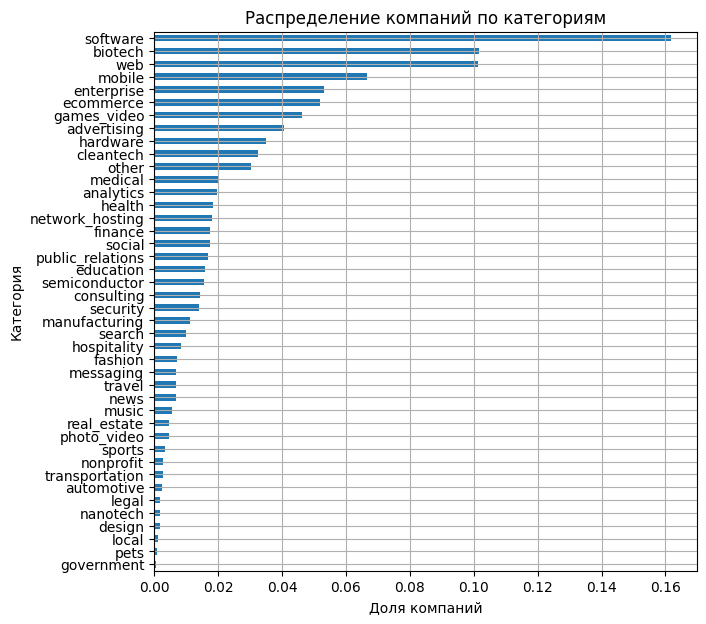

In [85]:
# Визуализируем значения value_counts() с помощью линейчатой диаграммы
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 7))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
filtered_df["category_code"].value_counts(normalize=True).sort_values(
    ascending=True
).plot(
    kind="barh",  # Тип графика — столбчатая диаграмма
    rot=0,  # Градус вращения подписи по оси Х
    legend=False,  # Выключаем легенду
    title=f"Распределение компаний по категориям",
)

# Настраиваем оформление графика
plt.xlabel("Доля компаний")
plt.ylabel("Категория")
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [86]:
# Находим 90-й процентиль цены
outliers = filtered_df["price_amount"].quantile(0.90)

# Отбираем данные, оставляя значения меньше найденного порога выбросов
filtered_df_categories = filtered_df[(filtered_df["price_amount"] <= outliers)]

# Создадим список категорий, доля которых составляет более 2%, чтобы их потом отфильтровать
categorу_shares = filtered_df["category_code"].value_counts(normalize=True)
categorу_shares_list = categorу_shares[categorу_shares >= 0.02].index

# Отфильтруем датафрейм, оставив компании с долей более 0.02 и с ценой неравной нулю
filtered_df_categories = filtered_df[
    (
        filtered_df["category_code"].isin(categorу_shares_list)
        & (filtered_df["price_amount"] != 0)
    )
].copy()

# Добавим в датафрейм значение цены в миллионах
filtered_df_categories.loc[:, "price_amount_mln"] = (
    filtered_df_categories["price_amount"] / 1000000
)
# filtered_df_categories.info()

In [87]:
# Посчитаем типичные цены и разброс цен
filtered_df_categories_prices = filtered_df_categories.groupby("category_code").agg(
    {"price_amount_mln": ["median", "std", "count"]}
)
display(filtered_df_categories_prices)

price_amount_mln                     
                        median            std count
category_code                                      
advertising               60.0     495.483858    84
biotech                  200.0    1968.195264   263
cleantech                185.0     874.419628    39
ecommerce                180.0     282.331182    49
enterprise               54.75  241358.098251   116
games_video              58.25    1463.477654    88
hardware                  76.0     645.087366    78
mobile                    56.0    1319.471637   117
other                    71.55    2060.860617    84
software                 48.14    1204.058888   403
web                       55.0     670.782668   259

In [88]:
# Получим топ-5 категорий по медиане
top_5_categories_median = (
    filtered_df_categories_prices["price_amount_mln"]
    .sort_values(by="median", ascending=False)
    .head(5)
)

display(top_5_categories_median)

# Получим топ-5 категорий по стандартному отклонению
top_5_categories_std = (
    filtered_df_categories_prices["price_amount_mln"]
    .sort_values(by="std", ascending=False)
    .head(5)
)

display(top_5_categories_std)

,median,std,count
category_code,,,
biotech,200.0,1968.195264,263
cleantech,185.0,874.419628,39
ecommerce,180.0,282.331182,49
hardware,76.0,645.087366,78
other,71.55,2060.860617,84


,median,std,count
category_code,,,
enterprise,54.75,241358.098251,116
other,71.55,2060.860617,84
biotech,200.0,1968.195264,263
games_video,58.25,1463.477654,88
mobile,56.0,1319.471637,117


Text(0, 0.5, 'Категория компании')

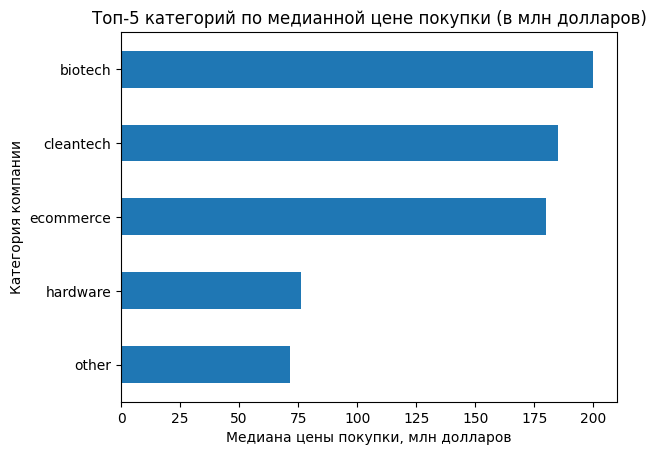

In [89]:
# Построим линейчатую диаграмму для медианы
top_5_categories_median["median"].sort_values(ascending=True).plot(
    kind="barh",
    title="Топ-5 категорий по медианной цене покупки (в млн долларов)",
)
plt.xlabel("Медиана цены покупки, млн долларов")
plt.ylabel("Категория компании")

Text(0, 0.5, 'Категория компании')

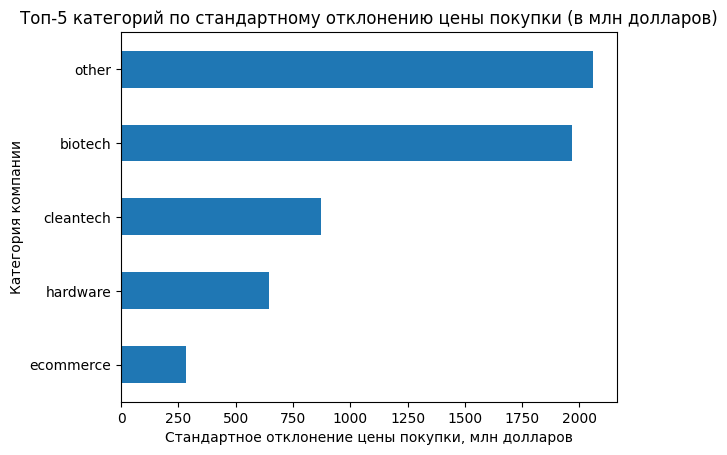

In [90]:
# Построим линейчатую диаграмму для стандартного отклонения
top_5_categories_median["std"].sort_values(ascending=True).plot(
    kind="barh",
    title="Топ-5 категорий по стандартному отклонению цены покупки (в млн долларов)",
)
plt.xlabel("Стандартное отклонение цены покупки, млн долларов")
plt.ylabel("Категория компании")

**Вывод:**

Изучены категории стартапов, выделены категории с типично высокими ценами покупки (медиана цены покупки) и значительным разбросом цен (стандартное отклонение цены покупки).

Для оценки медианы и стандартного отклонения данные были отфильтрованы следующим образом:
* Выбраны те категории стартапов, доля которых составляет не менее 2% от общего количества
* Цены покупки: отфильтрован 90% перцентиль, отфильтрованы стартапы, цена которых составила 0 долларов.

Типично высокие цены покупки характерны для следующих типов стартапов:
1. biotech	
2. cleantech
3. ecommerce	
4. hardware
5. other	

Высокий разброс цен характерен для следующих типов стартапов:
1. enterprise
2. other
3. biotech
4. games_video
5. mobile	


### Оценка количества раундов финансирования стартапа перед покупкой

Оценим типичное значение количества раундов для каждого возможного статуса стартапа.

Необходимо выполнить группировку по статусу стартапа и посчитать медианное количество раундов.

In [91]:
# Посмотрим, сколько компаний имеют то или иное количество раундов финансирования
display(filtered_df["funding_rounds"].value_counts())

1     20546
0      9076
2      6144
3      2665
4      1218
5       601
6       249
7       147
8        67
9        46
10       23
11       10
13        5
12        3
15        2
14        1
Name: funding_rounds, dtype: Int64

In [92]:
# Вычислем доли компанию, имеющих то или иное количество раундов финансирования
display(filtered_df["funding_rounds"].value_counts(normalize=True))

1     0.503541
0     0.222435
2     0.150577
3     0.065314
4     0.029851
5     0.014729
6     0.006102
7     0.003603
8     0.001642
9     0.001127
10    0.000564
11    0.000245
13    0.000123
12    0.000074
15    0.000049
14    0.000025
Name: funding_rounds, dtype: Float64

In [93]:
# Найдем типичные значения количества раундов по статусу
mean_statuses = (
    filtered_df.groupby("status")["funding_rounds"].mean().astype(float).round(2)
)
median_statuses = (
    filtered_df.groupby("status")["funding_rounds"].median().astype(float).round(2)
)
display(mean_statuses)
display(median_statuses)

status
acquired     0.52
closed       1.38
ipo          1.93
operating    1.52
Name: funding_rounds, dtype: float64

status
acquired     0.0
closed       1.0
ipo          1.0
operating    1.0
Name: funding_rounds, dtype: float64

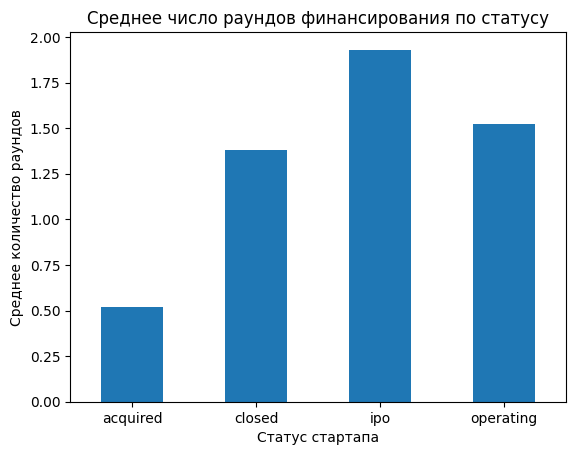

In [94]:
# Построим столбчатую диаграмму среднего
mean_statuses.plot(
    kind="bar", title="Среднее число раундов финансирования по статусу", rot=0
)
plt.ylabel("Среднее количество раундов")
plt.xlabel("Статус стартапа")
plt.show()

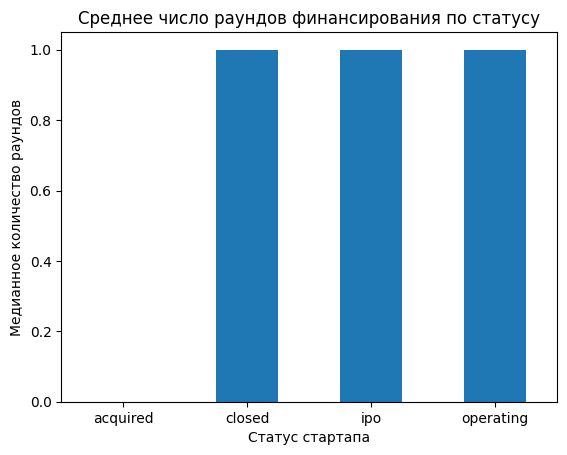

In [95]:
# Построим столбчатую диаграмму медианы
median_statuses.plot(
    kind="bar", title="Среднее число раундов финансирования по статусу", rot=0
)
plt.ylabel("Медианное количество раундов")
plt.xlabel("Статус стартапа")
plt.show()

**Вывод:* 

Были проанализированы данные столбца `funding_rounds` и оценена доля компаний в разрезе количества раундов финансирования. Больше всего компаний с 1 раудом финансирования (доля 0.503541), далее с 0 раундов финансирования (доля 0.222435). Далее, чем больше раундов финансирования, тем меньше таких компаний.

Наименьшее количество раундов финансирования характерно для компаний со статусом acquired, наибольшее количество раундов финансирования характерно для компаний со статусом ipo

Был изучено типичное значение количества раундов для каждого возможного статуса стартапа. Cреднее количество раундов распределилось таким образом:
* acquired     0.52
* closed       1.38
* ipo          1.93
* operating    1.52

Медианное количество раундов распределилось таким образом:
* acquired     0.0
* closed       1.0
* ipo          1.0
* operating    1.0


## Итоговый вывод и рекомендации

**Общий обзор проделанной работы**

 Изучены данные о раундах финансирования стартапов по годам:

- Проведена предобработка данных
- Исследована полнота данных и сведений о сотрудниках стартапов
- Изучена возможность объединения данных по столбцу `network_username`
- Изучены данные датафрейма `df_rounds` с информацией о компаниях и раундах финансирования
- Данные объединены для дальнейшего анализа
- Проанализированы выбросы 
- Исследованы компании, проданные за ноль или 1 доллар
- Изучены цены стартапов по категориям
- Изучено, количество раундов стартапов в зависимости от их статуса

**Ответы на исследовательские вопросы и главные выводы**

- Раунды финансирования по годам
    - От года к году наблюдается планомерное увеличение количества раундов инвестирования. Со временем изменился тренд, изначально выделяли больше средств, но реже, а потом стали выделять меньше, но чаще. Типичный размер собранных в рамках одного раунда средств был максимален в 2005 год.
- Люди и образование
    - Для стартапов характерно малое количество сотрудников, в связи с этим данные были разбиты на группы, для которых рассчитано количество людей без образования, значение находится в диапазоне 45% - 53% для всех групп, за исключением стартапов 26+ человек, для которых количество людей с образованием составляет в среднем 27%. 
- Объединение данных по столбцу network_user.
-    Объединение данных по столбцу network_user не представляется возможным, так как значения network_user в разных датафреймах практически не пересекаются и несут разную информацию.
- Проблемный датафрейм `df_rounds` и причина возниконевения пропусков
    - Проведена подготовка данных к дальнейшей работе, проанализированы пропуски. Возможная причина возникновения пропусков - объединены данные из двух таблиц в одну, при этом в каждой из таблиц данные собирались по-разному.
- Объединение данных
    - Получен датафрейм `filtered_df`, включающий в себя 40803 строк. Данные отфильтрованы следующим образом:
        - значения `funding_round` больше нуля
        - значения `investment_rounds` больше нуля
        - значения `status` указаны как `acquired`
- Aнализ выбросов
    - Было выявлено, что распределение сумм финансирования выглядет ассиметрично, с характерным смещением профиля значений в сторону высоких значений, не являющихся выборосами. Тем не менее, 1% самых высоких значений значимым образом искажает статистику. По-видимому это единичные компании, которые имеют экстремально высокий уровень финансирования.
- Анализ объема финансирования стартапов, купленных за 0 или 1 доллар:
    - Рассчитаны основные метрики и верхняя и нижняя граница выбросов для столбца funding_total. Выбросами являются значения финансирования выше 35.5 млн долларов, что соответствует 91% перцентилю
- Цены стартапов по категориям
    - Типично высокие цены покупки характерны для следующих типов стартапов: biotech, cleantech, ecommerce, hardware, other.
    - Высокий разброс цен характерен для следующих типов стартапов: enterprise, other, biotech, games_video, mobile	
- Оценка количества раундов финансирования перед покупкой
    - Наименьшее количество раундов финансирования характерно для компаний со статусом acquired, наибольшее количество раундов финансирования характерно для компаний со статусом ipo. Cреднее количество раундов  для каждого возможного статуса стартапа: status acquired - 0.524, closed 1.38, ipo 1.93, operating 1.52.
    
**Рекомендации на основе анализа данных**

1. Рекомендуется обращать внимание на компании с минимальным числом раундов финансирования. Такие стартапы чаще имеют высокую цену покупке. Это хорошая цель для быстрой покупки с последующей продажей, следовательно можно получить максимальный ROI.
2. Рекомендуется избегать стартапы, которые получают большое количество финансирования. По мере увеличения объема финансирования, цена покупки такого стартапа снижается. По этой причине инвесторам стоит сфокусировать на стартапах с низким уровнем финансирования.
3. Стартапы со статусом ipo имеют самое большое количество раундов финансирования в среднем, что может сделать их наименее выгодной покупкой с целью дальнейшей перепродажи, в то время как стартапы со статусом acquired имеют в среднем меньше количество раундов финансирования, что может сделать их более привлекательной покупкой с целью перепродажи.
4. Неободимо учитывать тот факт, что часть стартапов продается за 0 или 1 доллар, не смотря на то, что данные стартапы могли имень внушительное финансирование. Это может говорить о том, что вмешиваются дополнительные неучтенные факторы, например, слияние с другими компаниями.
5. С учетом общих тенценций на рынке финансирования стартапов, рекомендуется делать более частые, но малые инвестиции, которые со временм стали трендом.
6. Рекомендуется присмотреться к стартапам следующих категорий для максимальной выгоды при продаже: biotech, cleantech, ecommerce, hardware, other
7. Максимальная разброс цен при продаже наблюдается для следующих категорий стартапов: enterprise, other, biotech, games_video, mobile. Высокая волатильность может привести как к большим убыткам, так и к высокой премии за риск.
8. Необходимо учитывать, что данные приведены до 2013 года, для выявления текущих тенденций рекомендуется воспользоваться более свежими данными.